In [1]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *
from calculate_metrics import Calculate_Metrics





#wmt modes

process_gen_modes=["wmt_samples5", "wmt_samples3", "wmt_samples0", "wmt_samples1", "wmt_samples2_1","wmt_samples2_2"]

dfs_by_model,processGens,(root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric)= get_dfs_by_model(process_gen_modes)
examples_df = pd.concat(list(dfs_by_model.values()))






ModuleNotFoundError: No module named 'PostMetric'

In [2]:

# max_example_idx = examples_df["example_idx"].max()
# plots_wide=1
# num_models=len(dfs_by_model.keys())
# plots_tall=math.ceil(num_models/plots_wide)

# suptitle=""
# axs=None
# fig=None


# for idx, (model_name, filtered_df) in enumerate(dfs_by_model.items()):
#     filtered_df["rank"]=100-filtered_df["example_idx"]
#     if axs is None:
#         ax=None
#     else:
#         title=model_name
#         if(num_models>1):
#             axs_x=idx % plots_wide
#             axs_y= math.floor(idx / plots_wide)
#             ax=axs[axs_x, axs_y]
#         else:
#             ax=axs

    
#     def calculate_title():
#         return f"{model_name}: {suptitle}" if ax is None else model_name
#     # plot by rank within sentence
#     suptitle="Grouped by rank within sentence"
#     plot_smooth_spline(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax, figsize=(5,5))   
# if fig is not None:
#     fig.suptitle(title)
#     fig.tight_layout()
    

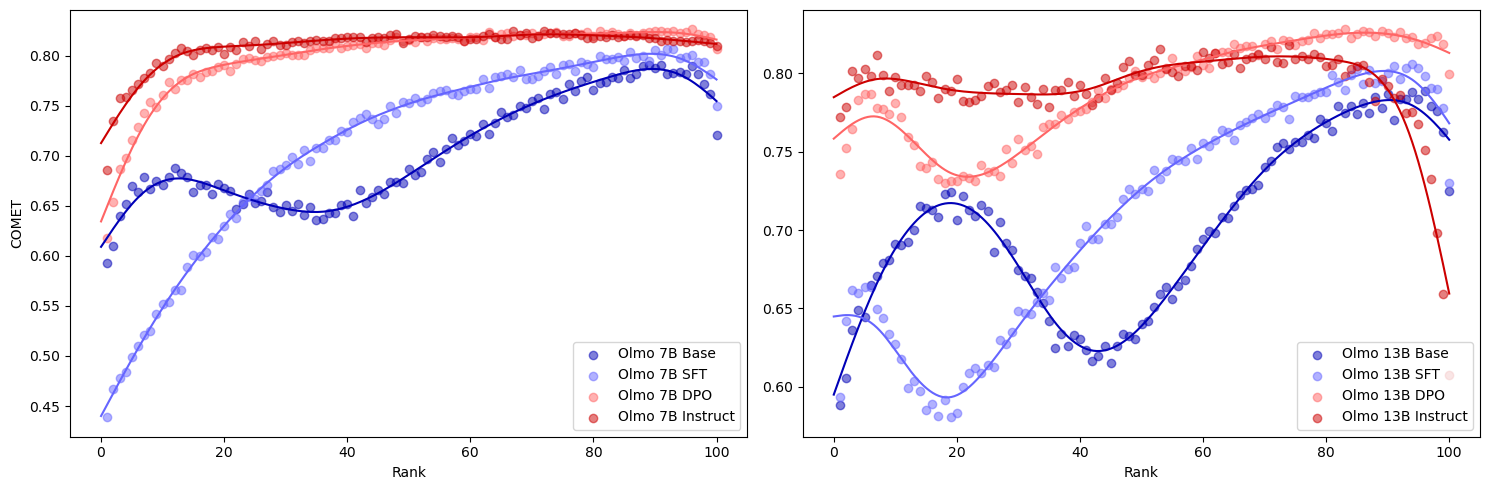

In [3]:


def plot_gam(df, compare_metric, ax,color, label):

    if(ax is None):
        _, ax = plt.subplots(figsize=(10, 10))
    
    grouped = df.groupby("example_idx")[["rank", compare_metric]].mean()


    # Assuming df is your dataframe
    X = grouped["rank"].values
    y = grouped[compare_metric].values


    gam = LinearGAM(s(0))

    # Fit the model to the data
    gam.fit(X, y)

    X_pred = np.linspace(0, 100,200).reshape(-1, 1)
    y_pred = gam.predict(X_pred)

    # Plot the results
    ax.scatter(X, y, alpha=0.5, color=color, label=label)
    ax.plot(X_pred, y_pred, color=color)
    return ax

def create_plots(kwargs_array, graph_func, figsize=None):


    #green-blue attempt
    # color_array=['#ff0015', "#ff00ea", "#9500ff", "#1500ff"]

    cmap = plt.get_cmap('seismic')
    color_array = [cmap(i) for i in [0.15, 0.35, 0.65, 0.85]]
    # color_array = [cmap(i) for i in np.linspace(0.25, 0.6, 4)]

    # =["#1f77b4",  "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

    ncols=len( kwargs_array)


    if figsize is None:
        figsize=(1*5, ncols*5)
        print(f"figsize is {figsize}")
    _, axes=plt.subplots(nrows=1, ncols= ncols, figsize=figsize)
    
    for col, kwargs_vect in enumerate(kwargs_array):

        ax=axes[col] if ncols>1 else axes
        for idx, kwargs in enumerate(kwargs_vect):
            kwargs["ax"]=ax
            kwargs["color"]=color_array[idx]
            ax=graph_func(**kwargs)
        ax.legend()
        ax.set_xlabel("Rank")

    left_ax=  axes[0] if ncols>1 else axes
    left_ax.set_ylabel(READABLE_LABELS[compare_metric])
    plt.tight_layout()
    plt.xlabel="Rank"

types_array=[
    ["allenai_OLMo_2_1124_7B", "allenai_OLMo_2_1124_7B_SFT", "allenai_OLMo_2_1124_7B_DPO",  "allenai_OLMo_2_1124_7B_Instruct"],
    ["allenai_OLMo_2_1124_13B",  "allenai_OLMo_2_1124_13B_SFT",   "allenai_OLMo_2_1124_13B_DPO", "allenai_OLMo_2_1124_13B_Instruct"],
             ]

def make_kwargs(model_name):
    return {"df": dfs_by_model[model_name], "compare_metric":compare_metric, "label":get_model_details(model_name)["name"]}

types_kwargs_array=[ [make_kwargs(model) for model in models_vect]   for models_vect in types_array]

create_plots(kwargs_array=types_kwargs_array, graph_func=plot_gam, figsize=(15,5))


figsize is (5, 5)


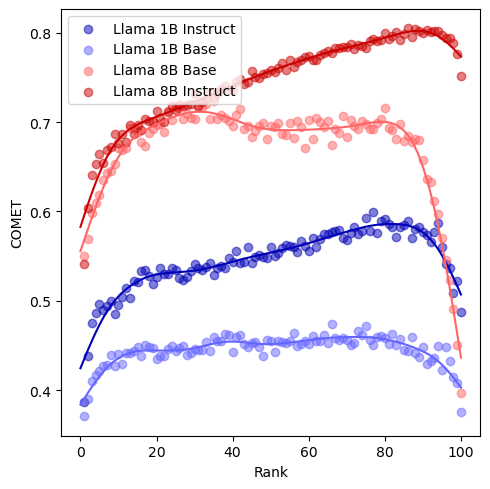

In [4]:


llama_models=[["meta_llama_Llama_3.2_1B_Instruct","meta_llama_Llama_3.2_1B", "meta_llama_Llama_3.1_8B", "meta_llama_Llama_3.1_8B_Instruct"]]




llama_base_kwargs=[ [make_kwargs(model) for model in models_vect]   for models_vect in llama_models]
create_plots(llama_base_kwargs, graph_func=plot_gam, figsize=None)






  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                        

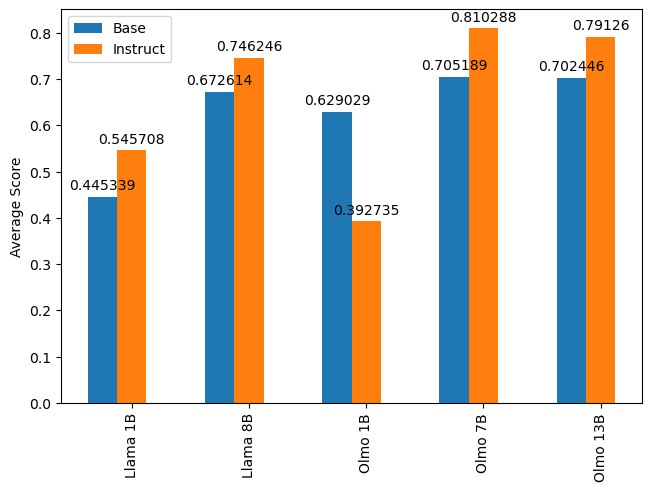

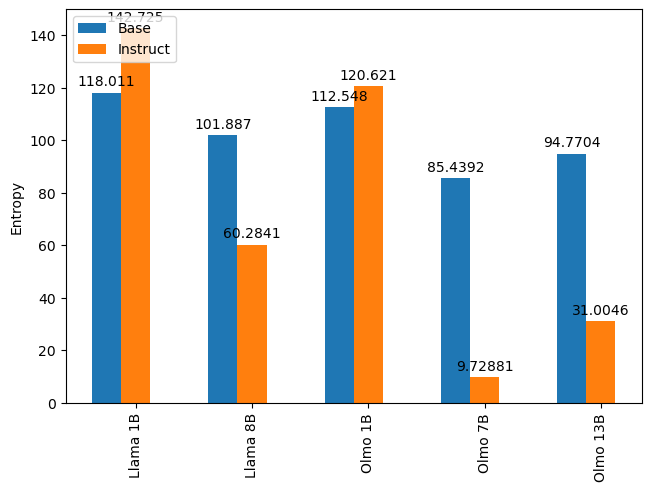

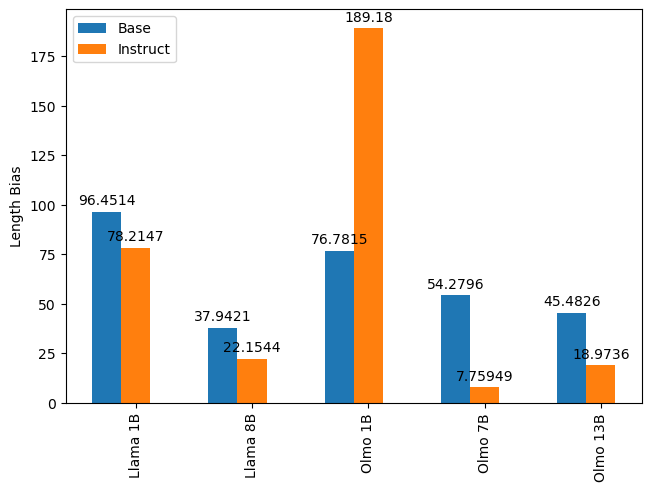

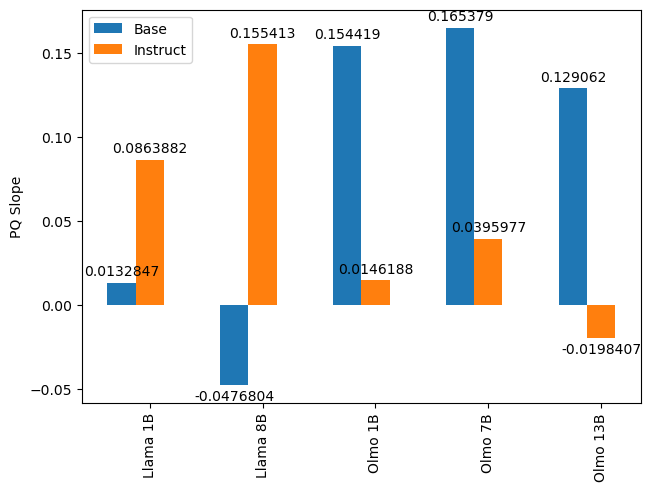

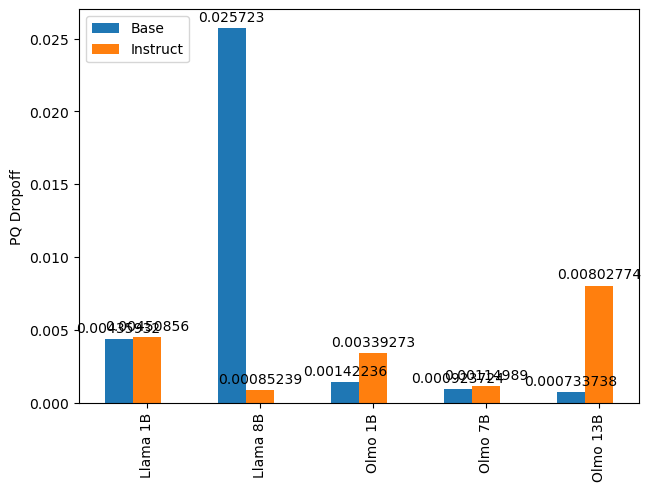

In [5]:
def compare_models_by_type(dfs_by_model, compare_metric,  base_models,  model_types):
    metrics_dict={}
    for base_model in base_models:


        for model_type in model_types:

            model = base_model if model_type=="Base" else f"{base_model}_{model_type}"

            metrics=Calculate_Metrics(dfs_by_model[model], compare_metric).get_best_metrics()
            for metric_name, metric_value in metrics.items():
                if metric_name != "model_name":
                    append_to_dict(metrics_dict, [metric_name, base_model, model_type], metric_value)    
        
    for metric_name, metric_by_model in metrics_dict.items():
        bar_graph_dict={}
        for model_type in model_types:
            bar_graph_dict[model_type]=[]

        model_names = metric_by_model.keys()

        readable_models= [get_model_details(model_name)['name'].replace(" Base", "") for model_name in model_names]
        base_models=[]
        for base_model, metric_by_type in metric_by_model.items():
            base_models.append(base_model)
            for model_type in model_types:
                bar_graph_dict[model_type].append(metric_by_type[model_type])
        x = np.arange(len(model_names))  # the label locations
        width = 0.25  # the width of the bars
        multiplier = 0

        fig, ax = plt.subplots(layout='constrained')

        for attribute, measurement in bar_graph_dict.items():
            offset = width * multiplier
            rects = ax.bar(x + offset, measurement, width, label=attribute)
            ax.bar_label(rects, padding=3)
            multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(metric_name)
        ax.set_xticks(x + width, readable_models)
        ax.legend(loc='upper left')
        plt.xticks(rotation=90)

        plt.show()




model_types=["Base", "Instruct"]
base_models=["meta_llama_Llama_3.2_1B", "meta_llama_Llama_3.1_8B", "allenai_OLMo_2_0425_1B", "allenai_OLMo_2_1124_7B","allenai_OLMo_2_1124_13B"]
compare_models_by_type(dfs_by_model, compare_metric,  base_models,  model_types)





  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |#######################

{'Base': [0.7051886246675254, 0.7024463241338731], 'SFT': [0.71294364887774, 0.7107744899058343], 'DPO': [0.8008868232253193, 0.7894403561010956], 'Instruct': [0.8102876703515652, 0.7912597180572153]}
{'Base': [85.43922407823531, 94.77035414384227], 'SFT': [35.686251768740995, 53.83716996471947], 'DPO': [16.761950720794914, 39.263753862886155], 'Instruct': [9.728811392190755, 31.00463987172673]}
{'Base': [np.float64(54.27955235523554), np.float64(45.48259225922591)], 'SFT': [np.float64(37.56774557455745), np.float64(48.03287488748875)], 'DPO': [np.float64(15.632028802880294), np.float64(21.183587158715877)], 'Instruct': [np.float64(7.759494749474949), np.float64(18.97362256225624)]}
{'Base': [np.float64(0.1653789987784765), np.float64(0.12906216853472563)], 'SFT': [np.float64(0.296443757544149), np.float64(0.23428772206618353)], 'DPO': [np.float64(0.08993028008299404), np.float64(0.09497299618455267)], 'Instruct': [np.float64(0.03959768593831712), np.float64(-0.01984067735525712)]}
{'B

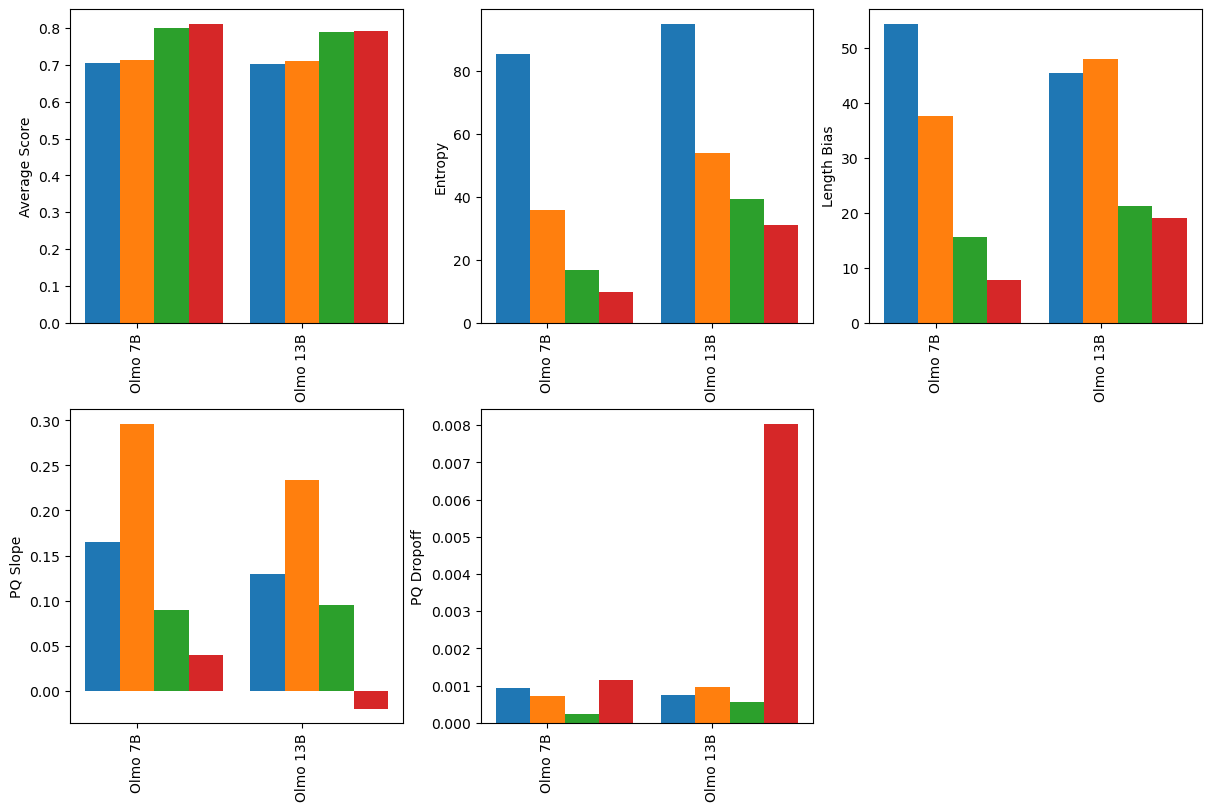

In [6]:
import math
model_types = ["Base", "SFT", "DPO", "Instruct"]
base_models= [ "allenai_OLMo_2_1124_7B", "allenai_OLMo_2_1124_13B"]



def compare_models_by_type(dfs_by_model, compare_metric,  base_models,  model_types):
    metrics_dict={}
    for base_model in base_models:


        for model_type in model_types:

            model = base_model if model_type=="Base" else f"{base_model}_{model_type}"

            metrics=Calculate_Metrics(dfs_by_model[model], compare_metric).get_best_metrics()
            for metric_name, metric_value in metrics.items():
                if metric_name != "model_name":
                    append_to_dict(metrics_dict, [metric_name, base_model, model_type], metric_value)    
        
    ncols=3
    nrows=2
    fig, axes = plt.subplots(nrows, ncols, layout='constrained', figsize=(12,8))

    metric_items = list(metrics_dict.items())
    for row in range(nrows):
        for col in range(ncols):
            ax = axes[row][col]
            if len(metric_items)>0:
                metric_name, metric_by_model = metric_items.pop(0)
                
                
                bar_graph_dict={}
                for model_type in model_types:
                    bar_graph_dict[model_type]=[]

                model_names = metric_by_model.keys()

                readable_models= [get_model_details(model_name)['name'].replace(" Base", "") for model_name in model_names]
                base_models=[]
                for base_model, metric_by_type in metric_by_model.items():
                    base_models.append(base_model)
                    for model_type in model_types:
                        bar_graph_dict[model_type].append(metric_by_type[model_type])
                x = np.arange(len(model_names)) *1.2 # the label locations
                width = 0.25  # the width of the bars
                multiplier = 0

                
                print(bar_graph_dict)
                for attribute, measurement in bar_graph_dict.items():
                    offset = width * multiplier
                    rects = ax.bar(x + offset , measurement, width, label=attribute)
                    # ax.bar_label(rects, padding=3)
                    multiplier += 1
                    # break

                # Add some text for labels, title and custom x-axis tick labels, etc.
                ax.set_ylabel(metric_name)
                ax.set_xticks(x + width, readable_models, rotation=90)
            else:
                ax.axis('off')
    


    plt.show()


#ok, so there are 5 metrics
compare_models_by_type(dfs_by_model, compare_metric,  base_models,  model_types)

